## Домашнее задание 3. Матрично-векторное дифференцирование. Практика.
### __Deadline - 04.10.2024__

## Основная часть (всего 10 баллов)

__Задача 1. (1 балл)__ Для указанного графа вычислений найдите градиент $\nabla_A L, \nabla_b L$ функции потерь $L$ по входным переменным $A,b$ соответственно. Градиент по $x$ считать известным и равным $\nabla_x L$. Рекомендуется использовать алгоритм backpropogation. 

_Замечание_: не обращайте внимание на размерность матрицы $A$, считайте, что она квадратная ($A \in \mathbb{R}^{n \times n}$)

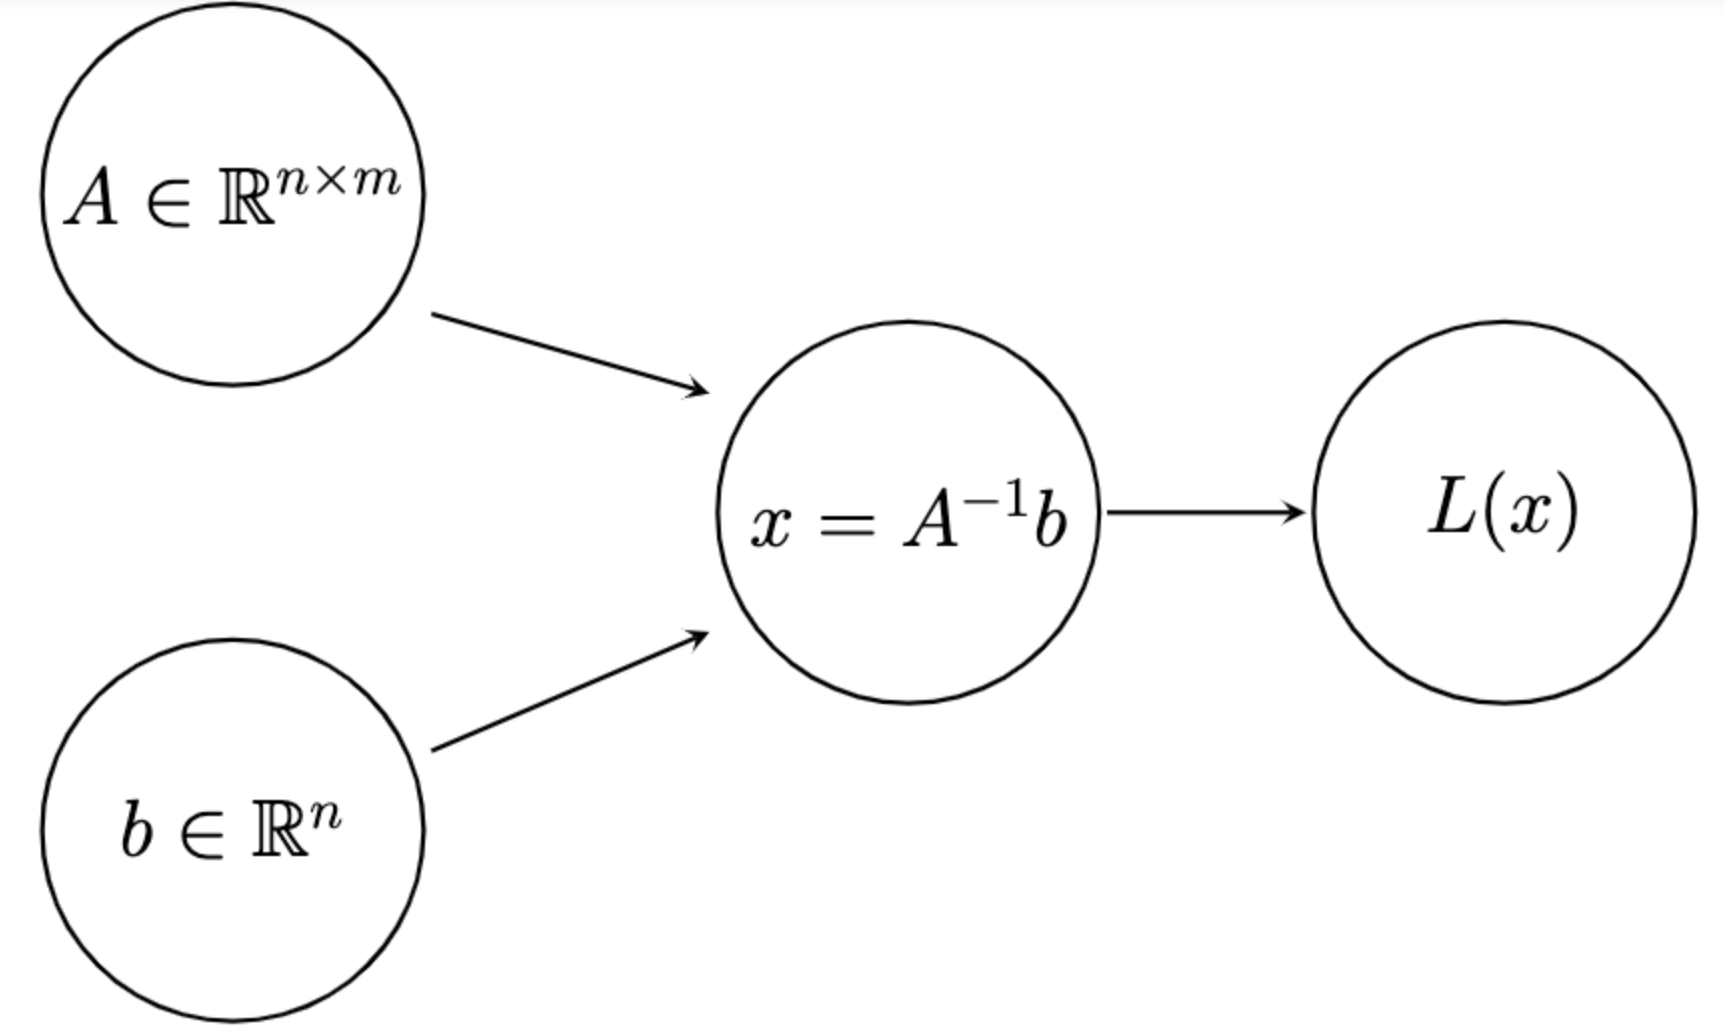

$dL = \langle \nabla_x L, dx \rangle = 
\text{Tr} \left( (\nabla_x L)^T dx \right) = 
\text{Tr} \left( (\nabla_x L)^T \cdot d(A^{-1}b) \right) = 
\text{Tr} \left( (\nabla_x L)^T \cdot \left( d(A^{-1})b + A^{-1} db \right) \right) = 
\text{Tr} \left( (\nabla_x L)^T \cdot \left( -A^{-1}dA \cdot A^{-1}b + A^{-1} db \right) \right) = 
\text{Tr} \left( -(\nabla_x L)^T \cdot A^{-1}dA \cdot A^{-1}b +  (\nabla_x L)^T \cdot A^{-1} db \right) = 
\text{Tr} \left( -A^{-1}b \cdot (\nabla_x L)^T \cdot A^{-1}dA +  (\nabla_x L)^T \cdot A^{-1} db \right) = 
\langle -A^{-T} \cdot \nabla_x L \cdot b^T A^{-T}, dA \rangle + \langle A^{-T} \cdot \nabla_x L, db \rangle = 
\langle \nabla_A L, dA \rangle + \langle \nabla_b L, db \rangle \Rightarrow$
$$\nabla_A L =  -A^{-T} \cdot \nabla_x L \cdot b^T A^{-T}$$
$$\nabla_b L = A^{-T} \cdot \nabla_x L$$

__Задача 2.__ Перед Вами стоит задача приближения матрицы $X  \in \mathbb{R}^{N \times M}$ неизвестными матрицами $U \in \mathbb{R}^{R\times N}, V \in \mathbb{R}^{R \times M}$ заданной размерности $R$. Такое приближение часто используется при поиске малоранговых приближений для передачи сжатой информации с минимальными потерями.

В качестве такого приближения предлагается использовать линейное представление $\hat{X} = U^T V$. Для оценки качества приближения будем использовать функцию *MSE*:
$$MSE(X, \hat{X}) = \frac{1}{2}||X - \hat{X} ||^2_F = \frac{1}{2}||X - U^T V||^2_F.$$

__a) (0.5 балла)__  Первым из предложенных методов будет обычный градиентный спуск. Для этого вычислите $\nabla_U MSE, \nabla_V MSE$ и реализуйте функцию ```grad(U, V, X)```, возвращающую значения для вычисленных аналитически градиентов.

$d \bigl( MSE(X, U^TV) \bigr) = 
\frac{1}{2} \cdot d \bigl( \langle X - U^TV, X - U^TV \rangle \bigr) = 
\langle X - U^TV, d(X - U^TV) \rangle = 
\langle X - U^TV, d(X - U^TV) \rangle = 
\text{Tr} \bigl( (X - U^TV)^T dX \bigr) - \text{Tr} \bigl( (X - U^TV)^T d(U)^T V \bigr) - \text{Tr} \bigl( (X - U^TV)^T U^T dV \bigr) = 
\text{Tr} \bigl( (X - U^TV)^T dX \bigr) - \text{Tr} \bigl( d(U)^T V (X - U^TV)^T \bigr) - \text{Tr} \bigl( (X - U^TV)^T U^T dV \bigr) = 
\langle X - U^TV, dX\rangle + \langle V(U^TV - X)^T, dU\rangle + \langle U(U^TV - X), dV \rangle =
\bigl\langle \nabla_X MSE(X, U^TV), dX \bigr\rangle + \bigl\langle \nabla_U MSE(X, U^TV), dU \bigr\rangle + \bigl\langle \nabla_V MSE(X, U^TV), dV \bigr\rangle \Rightarrow$
$$\nabla_U MSE(X, U^TV) = V(U^TV - X)^T$$
$$\nabla_U MSE(X, U^TV) = U(U^TV - X)$$

In [3]:
def grad(U, V, X):
    """
        U - матрица размера R*N;
        V - матрица размера R*M;
        X - матрица размера N*M. 
    """
    return V @ (U.T @ V - X).T, U @ (U.T @ V - X)

В качестве матрицы $X$ предлагается рассмотреть изображение моста из датасета, созданного для бенчмаркинга различных матричных разложений *`ImageCompressionBenchmark'* (см. прикрепленный файл). Это делается для наглядности результатов, полученных при использовании оптимизационных методов. 

In [4]:
file_name = 'bridge.pgm'

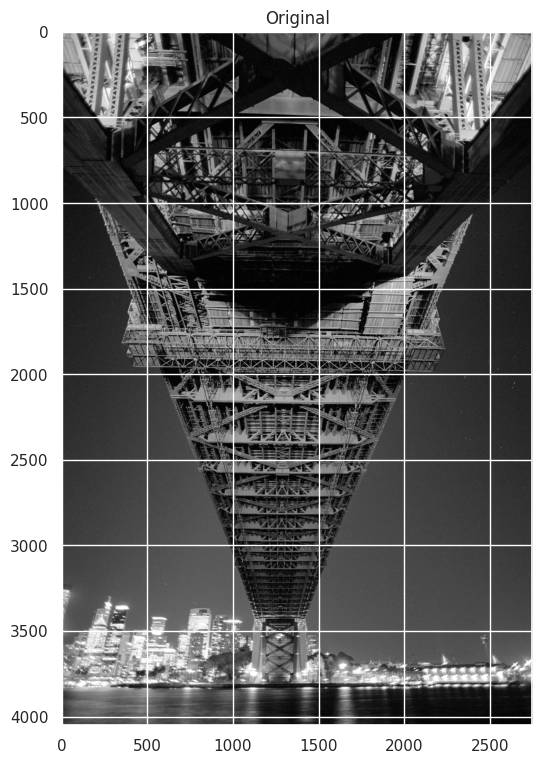

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import seaborn as sns
import matplotlib

sns.set_theme(palette='Set2', rc={'figure.figsize': (16, 9)})
matplotlib.rcParams['figure.figsize'] = (16, 9)

X = cv2.imread(file_name, -1)
plt.imshow(X, cmap='gray')
plt.title('Original')
plt.show()
N, M = X.shape

__б) (2 балла)__  Положим ранг $R = 10$. Реализуйте метод градиентного спуска, используя функцию подсчета градиента из предыдущего пункта. В качестве функции критерия используем *MSE*. Также необходимо сделать логгирование полученных значений критерии в зависимости от номера итерации $k$. Для удобства восприятия графиков ошибок, используйте отнормированные значения критерия, т.е.
$$\left(MSE (X, \hat{X}_k) ~/~ MSE (X, \hat{X}_0)\right),$$
где $ \hat{X}_k$ и $ \hat{X}_0$ - значения полученных аппроксимаций на $k$-ой и нулевой итерациях, соответсвенно.

Используйте предложенную функцию для реализации алгоритма и допишите недостающие фрагменты. После чего для проверки загрузите функцию в [контест](https://contest.yandex.ru/contest/66540/enter/).

In [6]:
from tqdm import tqdm


def MatrixGD(grad, criterion, U_0, V_0, X, eps, max_iter, **params):
    """
       :param: grad(U, V, X) - функция, которая считает градиент целевой функции;
       :param: criterion(X, X_k) - функция, которая считает критерий;
       :param: U_0, V_0 - стартовые значения матриц U и V;
       :param: X - матрица, приближение которой ищем;
       :param: eps - точность сходимости (обычно 1e-3);
       :param: max_iter - количество итераций;
       :param: **params - содержит именованные гиперпараметры метода:
           params['gamma'](k) - шаг, зависящий от номера итерации;
    """

    errors = []

    X_0 = U_0.T @ V_0

    X_k = np.copy(X_0)
    U = np.copy(U_0)
    V = np.copy(V_0)

    err_x_0 = criterion(X, X_k)
    errors.append(criterion(X, X_k) / err_x_0)

    for k in tqdm(range(max_iter)):
        grad_U, grad_V = grad(U, V, X)
        U = U - params['gamma'](k) * grad_U
        V = V - params['gamma'](k) * grad_V
        X_k = U.T @ V

        errors.append(criterion(X, X_k) / err_x_0)
        if errors[-1] < eps:
            break

    return X_k, errors

In [7]:
def criterion(X, X_hat):
    return np.mean((X - X_hat) ** 2)

__в) (1 балл)__ Запустите метод ```MatrixGD``` для сгенерированных стартовых матриц $U_0, V_0$ (функцию ```generate_starting_points``` изменять НЕ НУЖНО). В качестве шага подберите значение из предложенных: $\gamma = \{10^{-6}, 10^{-7}, 10^{-8}\}$.

Постройте график значений критерия от номера итерации. Выведите в виде картинки полученный результат.

In [8]:
def generate_starting_points(R, N, M):
    np.random.seed(1)

    U = 0.01 * np.random.randn(R, N)
    V = 0.01 * np.random.randn(R, M)
    return U, V

In [9]:
R = [1, 10, 100]
EPS = 1e-3
MAX_ITER = 200
GAMMA = [1e-6, 1e-7, 1e-8]

U_0, V_0 = generate_starting_points(R[1], N, M)
X_gamma = []
error_g = []

for gamma in GAMMA:
    X_cur, error = MatrixGD(grad, criterion, U_0, V_0, X, EPS, MAX_ITER, **{'gamma': lambda x: gamma})
    X_gamma.append(X_cur)
    error_g.append(error)

  4%|▎         | 7/200 [00:00<00:22,  8.77it/s]/tmp/ipykernel_43910/2063241176.py:31: RuntimeWarning: overflow encountered in matmul
  X_k = U.T @ V
/tmp/ipykernel_43910/2063241176.py:31: RuntimeWarning: invalid value encountered in matmul
  X_k = U.T @ V
  4%|▍         | 8/200 [00:01<00:21,  9.00it/s]/tmp/ipykernel_43910/170496836.py:7: RuntimeWarning: overflow encountered in matmul
  return V @ (U.T @ V - X).T, U @ (U.T @ V - X)
/tmp/ipykernel_43910/170496836.py:7: RuntimeWarning: invalid value encountered in matmul
  return V @ (U.T @ V - X).T, U @ (U.T @ V - X)
  6%|▌         | 11/200 [00:01<00:20,  9.13it/s]/tmp/ipykernel_43910/1830626625.py:2: RuntimeWarning: overflow encountered in square
  return np.mean((X - X_hat) ** 2)
100%|██████████| 200/200 [00:27<00:00,  7.28it/s]


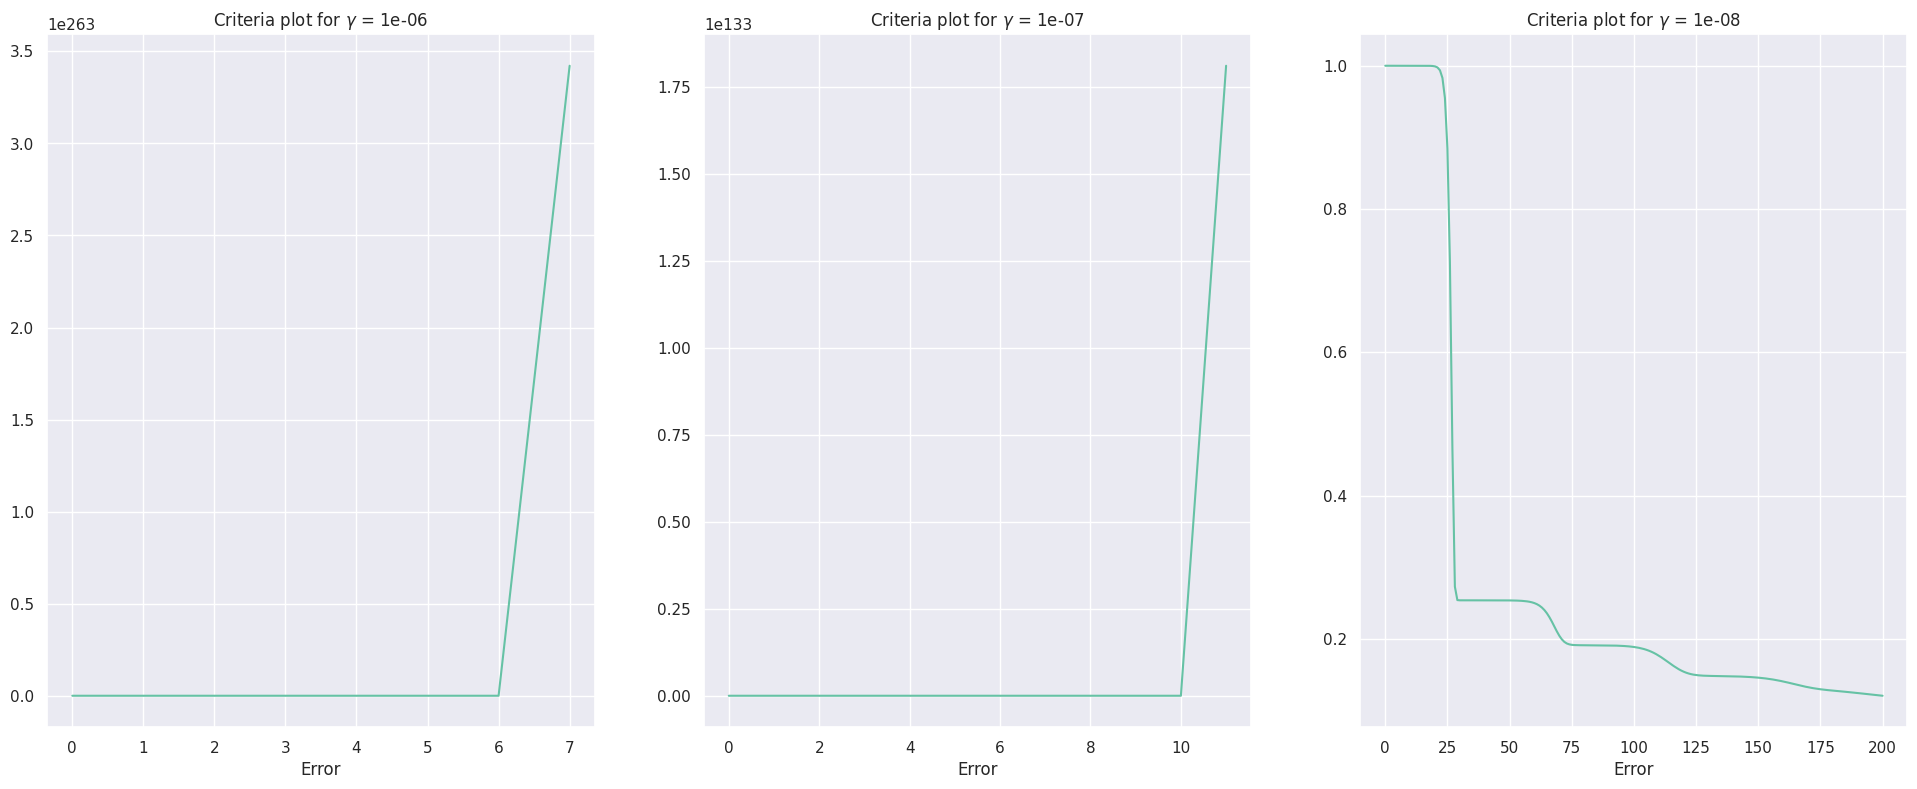

In [10]:
err_g_fig, err_g_axs = plt.subplots(ncols=len(GAMMA), figsize=(24, 9))

for i in range(len(GAMMA)):
    sns.lineplot(x=np.arange(0, MAX_ITER + 1), y=error_g[i], ax=err_g_axs[i])

    err_g_axs[i].set_title(r"Criteria plot for $\gamma$ = {}".format(GAMMA[i]))
    err_g_axs[i].set_xlabel("Iteration")
    err_g_axs[i].set_xlabel("Error")


Сходится при $\gamma = 10^{-8}$, значит надо использовать ее. При остальных сходимости нет

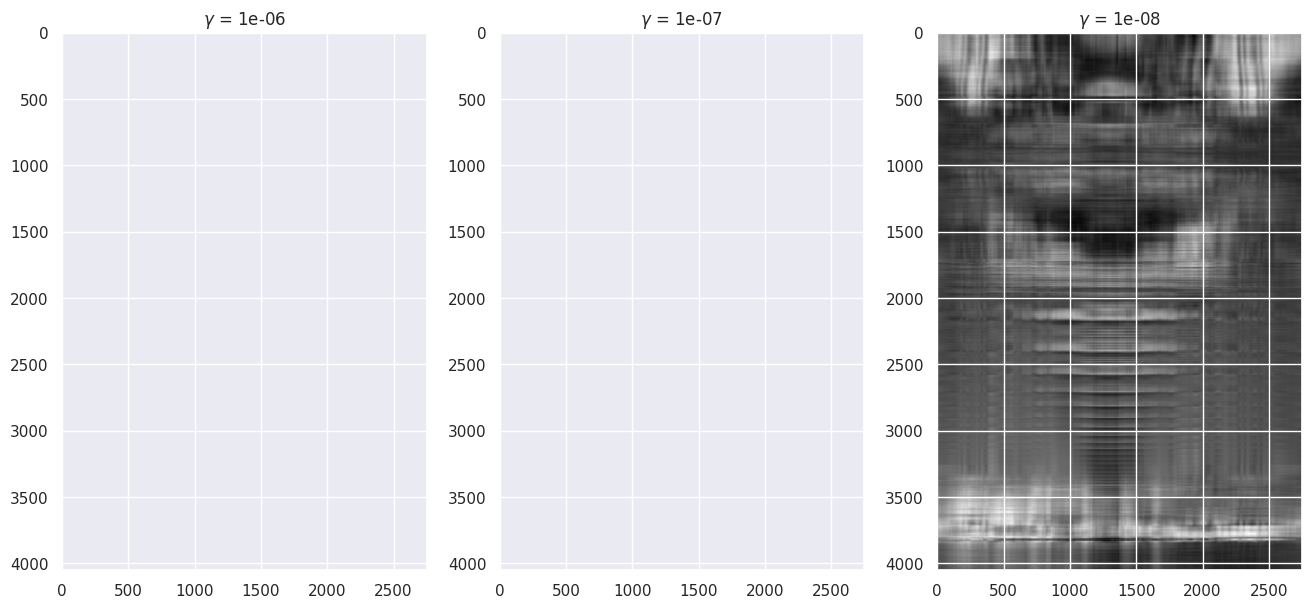

In [14]:
img_g_fig, img_g_axs = plt.subplots(ncols=len(R), figsize=(16, 9))

for i in range(len(GAMMA)):
    img_g_axs[i].imshow(X_gamma[i], cmap='gray')
    img_g_axs[i].set_title(r"$\gamma$ = {}".format(GAMMA[i]))

__г) (1 балл)__ Следующий этап -- сравнить качество приближений в зависимости от ранга $R$. Рассмотрите следующие значения $R = \{1, 10, 100\}$. Постройте сравнительный график зависимости значения критерия от номера итерации $k$ и выведите в виде картинки полученный результат. Шаг оставьте тот, для которого наблюдалась сходимость в предыдущем пункте. 

In [15]:
X_r = []
error_r = []

for r in R:
    U_0, V_0 = generate_starting_points(r, N, M)
    X_cur, error = MatrixGD(grad, criterion, U_0, V_0, X, EPS, MAX_ITER, **{'gamma': lambda x: GAMMA[2]})
    X_r.append(X_cur)
    error_r.append(error)

100%|██████████| 200/200 [00:25<00:00,  7.80it/s]


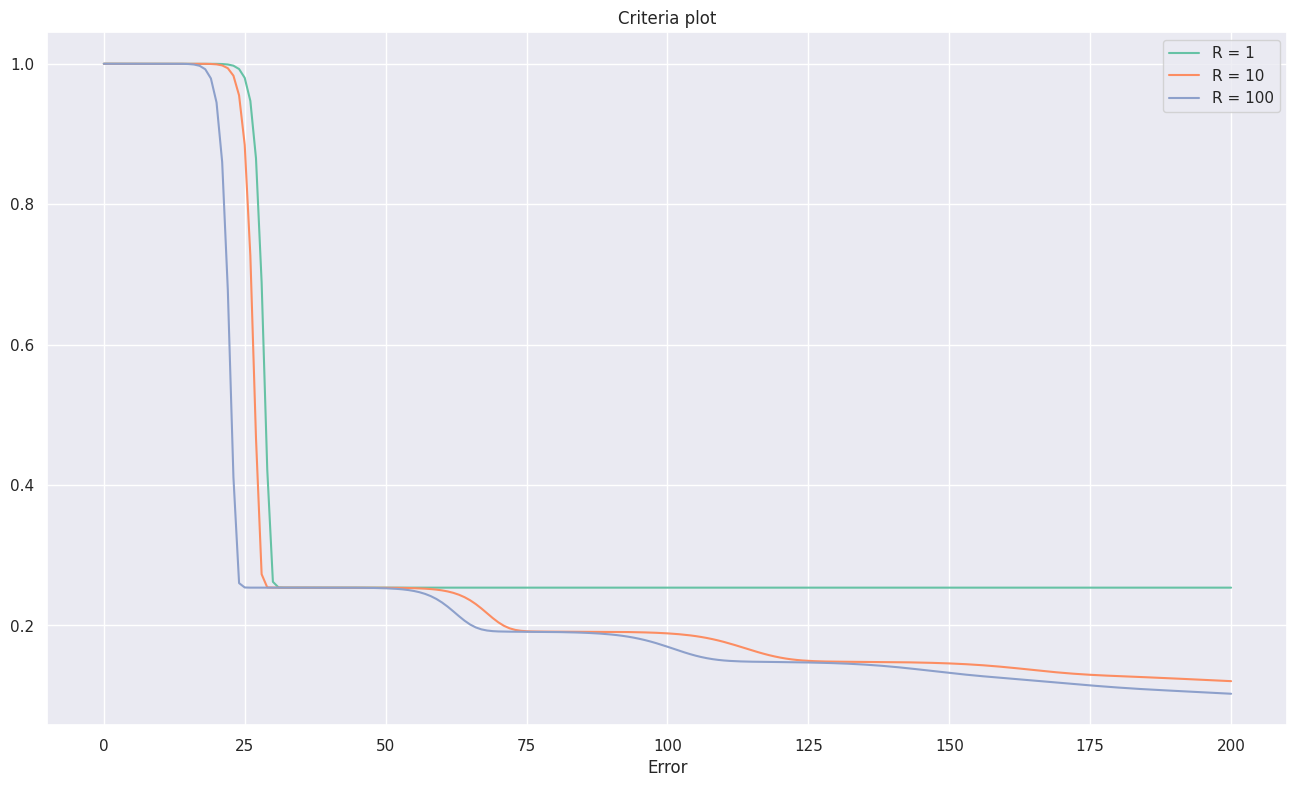

In [16]:
err_r_fig, err_r_axs = plt.subplots()
err_r_axs.set_title("Criteria plot")
err_r_axs.set_xlabel("Iteration")
err_r_axs.set_xlabel("Error")

for i in range(len(R)):
    sns.lineplot(x=np.arange(0, MAX_ITER + 1), y=error_r[i], ax=err_r_axs, label=f"R = {R[i]}")
plt.show()

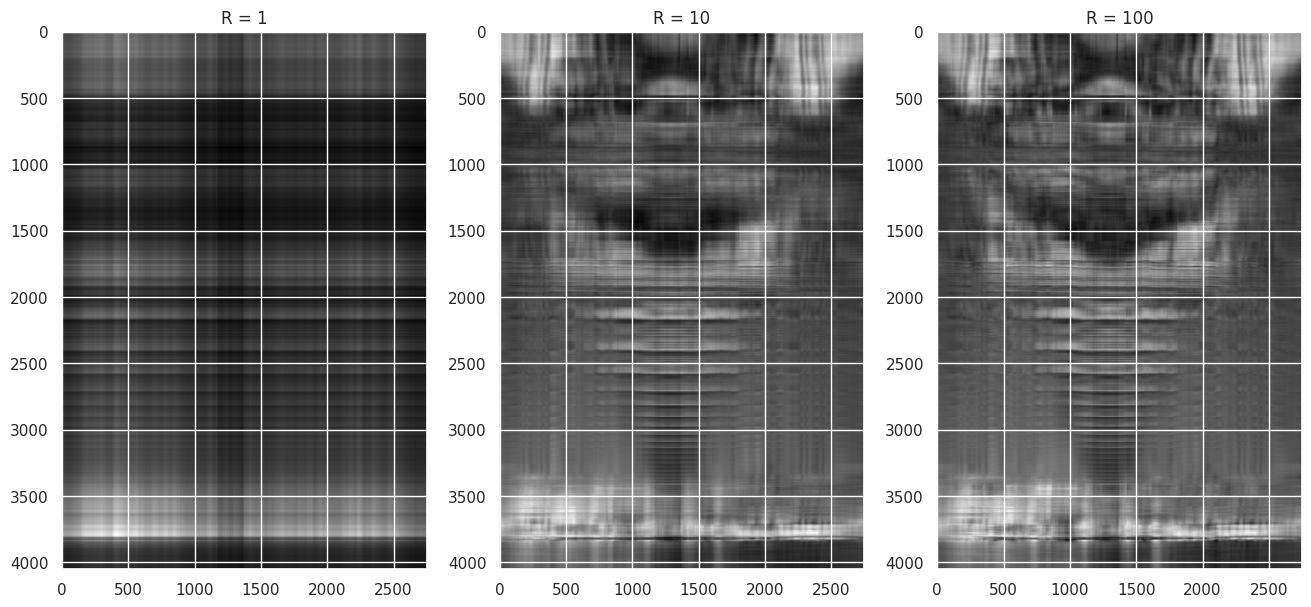

In [17]:
img_r_fig, img_r_axs = plt.subplots(ncols=len(R), figsize=(16, 9))

for i in range(len(R)):
    img_r_axs[i].imshow(X_r[i], cmap='gray')
    img_r_axs[i].set_title("R = {}".format(R[i]))

**Вывод:** чам больще $R$, тем лучше качество получаемого изображения и тем меньше значение критерия ошибки. Хороший результат получаем уже при $R = 10$. Увеличение до 100 лишь чуть уменьшает ошибку и улучшает качество.

__Задача 3.__ Теперь, когда вы реализовали метод градиентного спуска для подсчета аппроксимации, перейдем к рассмотрению безградиентного метода AlternatingLeastSquares (ALS) также довольно популярного при работе с восстановлением изображений. На $k$-ой итерации выполняются следующие действия:
1. Для всех $i = 1, \ldots, N$ подсчитать обновленное значение $i$-го столбца матрицы $U_k$:
$$ \left[U_k\right]_i = \left( V_{k - 1} V_{k - 1}^T + \lambda I \right)^{-1} V_{k - 1} X_i^T $$
2. Для всех $j = 1, \ldots, M$ подсчитать обновленное значение $j$-го столбца матрицы $V_k$:
$$ \left[V_k\right]_j = \left( U_{k} U_{k}^T + \lambda I \right)^{-1} U_{k} X_j $$

__а) (2 балла)__ Реализуйте метод ALS c аналогичными требованиями, как и в MatrixGD.

Используйте предложенную функцию для реализации алгоритма и допишите недостающие фрагменты. После чего для проверки загрузите функцию в [контест](https://contest.yandex.ru/contest/66540/enter/).

In [36]:
def ALS(criterion, U_0, V_0, X, eps, max_iter, **params):
    """
        :param: criterion(X, X_k) - функция, считающая критерий;
        :param: U_0, V_0 - стартовые значения матриц U и V;
        :param: eps - точность сходимости (обычно 1e-3);
        :param: X - матрица, приближение которой ищем;
        :param: max_iter - количество итераций;
        :param: **params - содержит именованные гиперпараметры метода:
            params['lambda'] - константа для отрешивания задачи поиска обратной матрицы;
    """

    errors = []

    X_0 = U_0.T @ V_0

    X_k = np.copy(X_0)
    U = np.copy(U_0)
    V = np.copy(V_0)

    err_x_0 = criterion(X, X_k)
    errors.append(criterion(X, X_k) / err_x_0)

    R = U_0.shape[0]

    for k in tqdm(range(max_iter)):
        U = np.linalg.inv(V @ V.T + np.eye(R) * params['lambda'](k)) @ V @ X.T
        V = np.linalg.inv(U @ U.T + np.eye(R) * params['lambda'](k)) @ U @ X
        X_k = U.T @ V

        errors.append(criterion(X, X_k) / err_x_0)
        if errors[-1] < eps:
            break

    return X_k, errors

__б) (1 балл)__ Запустите метод ALS с максимальным числом итераций равным 100, рангом $R$ = 10 и значениями $\lambda = \{1, 10, 100\}$. Постройте сравнительный график значения критерия от номера итерации $k$. Восстановите изображения. Что можно сказать о параметре $\lambda$? Нужен ли он? Если да, то в каких случаях?

In [37]:
LAMBDA = [1, 10, 100]

U_0, V_0 = generate_starting_points(R[1], N, M)
X_lambd = []
error_l = []

for lambd in LAMBDA:
    X_cur, error = ALS(criterion, U_0, V_0, X, EPS, MAX_ITER, **{'lambda': lambda x: lambd})
    X_lambd.append(X_cur)
    error_l.append(error)

100%|██████████| 200/200 [00:17<00:00, 11.52it/s]


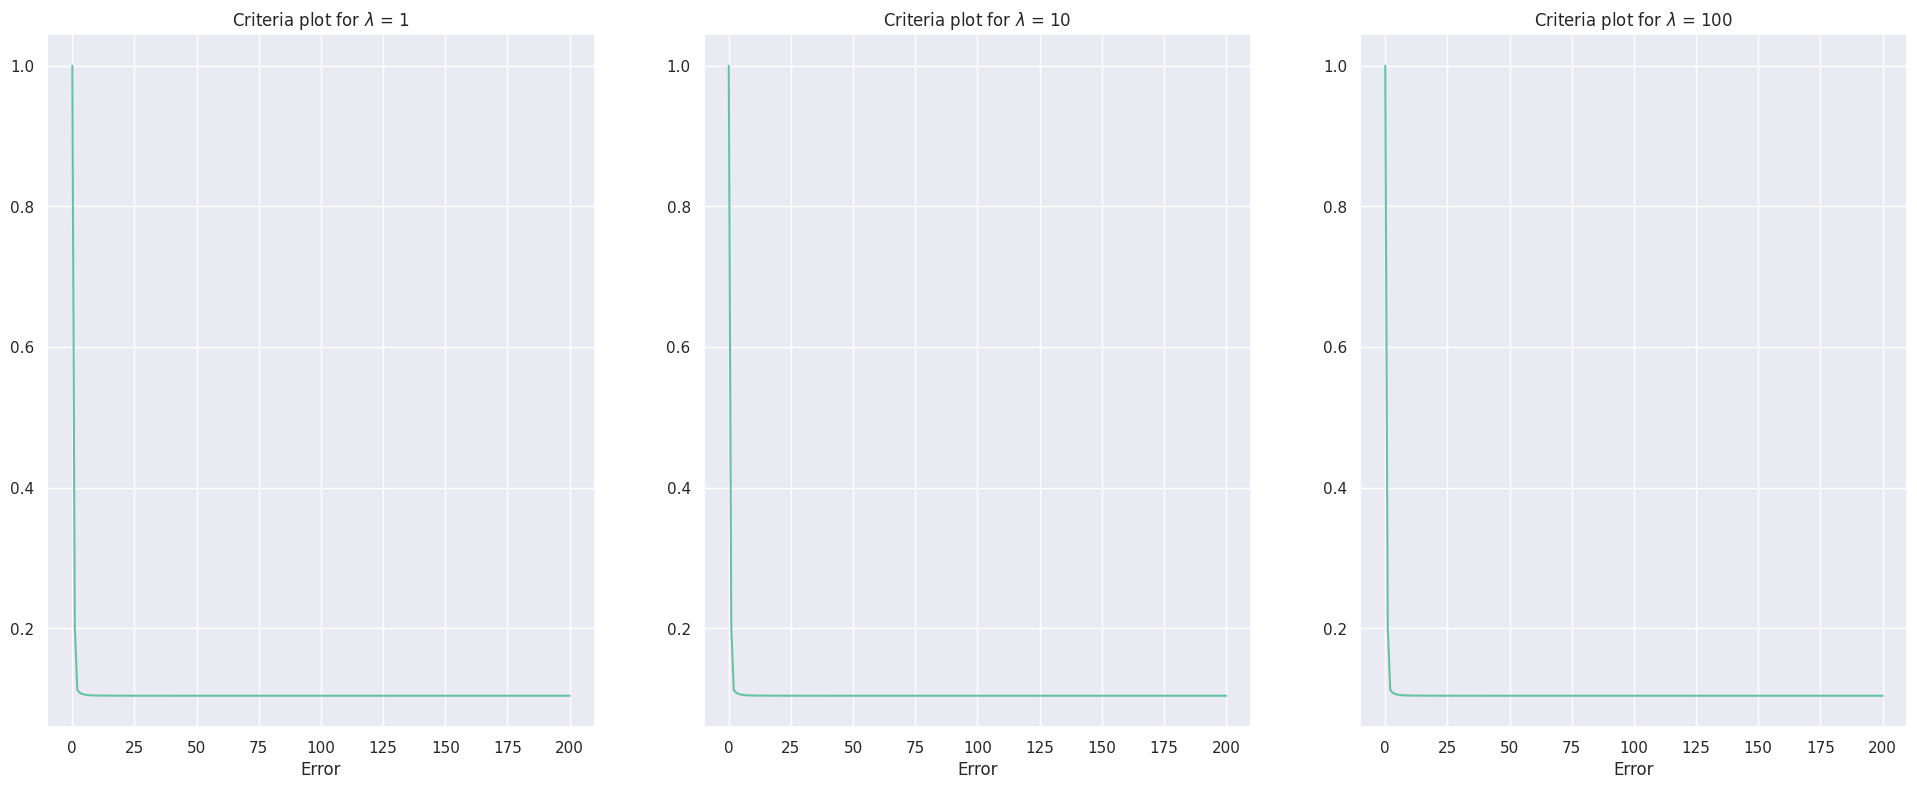

In [38]:
err_l_fig, err_l_axs = plt.subplots(ncols=len(LAMBDA), figsize=(24, 9))

for i in range(len(LAMBDA)):
    sns.lineplot(x=np.arange(0, MAX_ITER + 1), y=error_l[i], ax=err_l_axs[i])

    err_l_axs[i].set_title(r"Criteria plot for $\lambda$ = {}".format(LAMBDA[i]))
    err_l_axs[i].set_xlabel("Iteration")
    err_l_axs[i].set_xlabel("Error")

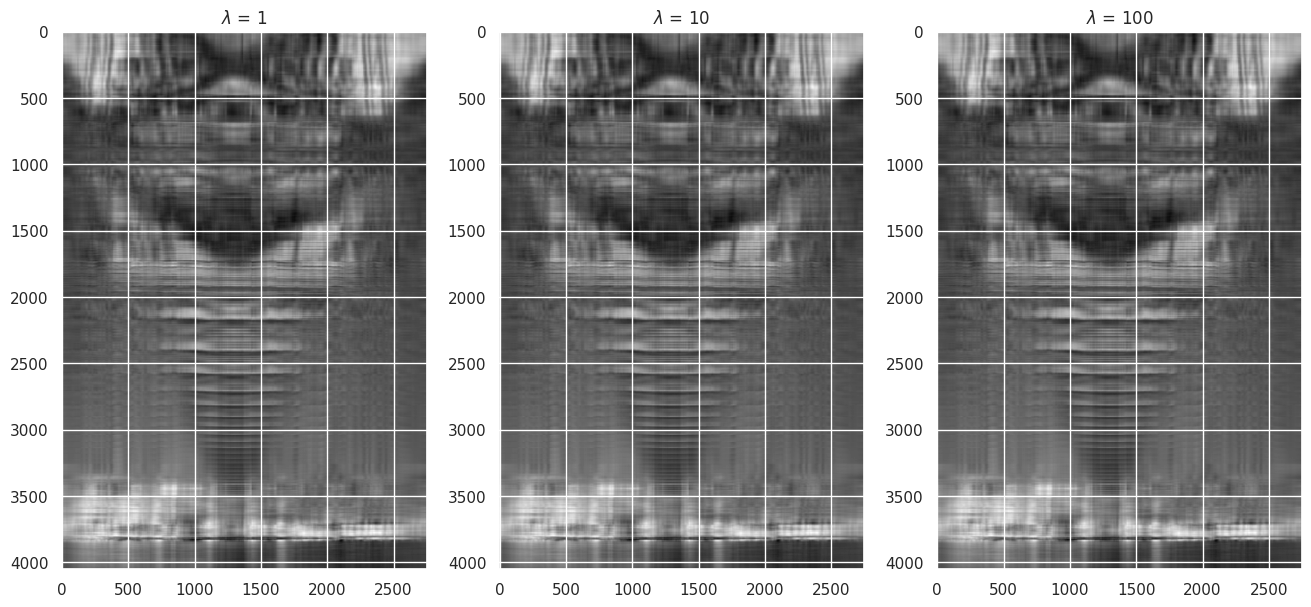

In [39]:
img_l_fig, img_l_axs = plt.subplots(ncols=len(LAMBDA), figsize=(16, 9))

for i in range(len(LAMBDA)):
    img_l_axs[i].imshow(X_lambd[i], cmap='gray')
    img_l_axs[i].set_title(r"$\lambda$ = {}".format(LAMBDA[i]))

**Вывод:** параметр $\lambda$ эффекта не имеет

__в) (1 балл)__ Как и в предыдущем задании, теперь необходимо сравнить качество приближений в зависимости от ранга $R$. Число итераций поставьте равным 10. Рассмотрите следующие значения $R = \{1, 10, 100\}$. Постройте сравнительный график зависимости значения критерия от номера итерации $k$ и выведите в виде картинки полученный результат. Параметр $\lambda$ выберите на ваше усмотрение.

Возьмем $\lambda = 10$.

In [25]:
ITER = 10

X_lambdr = []
error_lr = []

for r in R:
    U_0, V_0 = generate_starting_points(r, N, M)
    lambda_X_k, lambda_errors = ALS(criterion, U_0, V_0, X, EPS, ITER, **{'lambda': lambda x: lambd})
    X_lambdr.append(lambda_X_k)
    error_lr.append(lambda_errors)

100%|██████████| 10/10 [00:01<00:00,  9.42it/s]


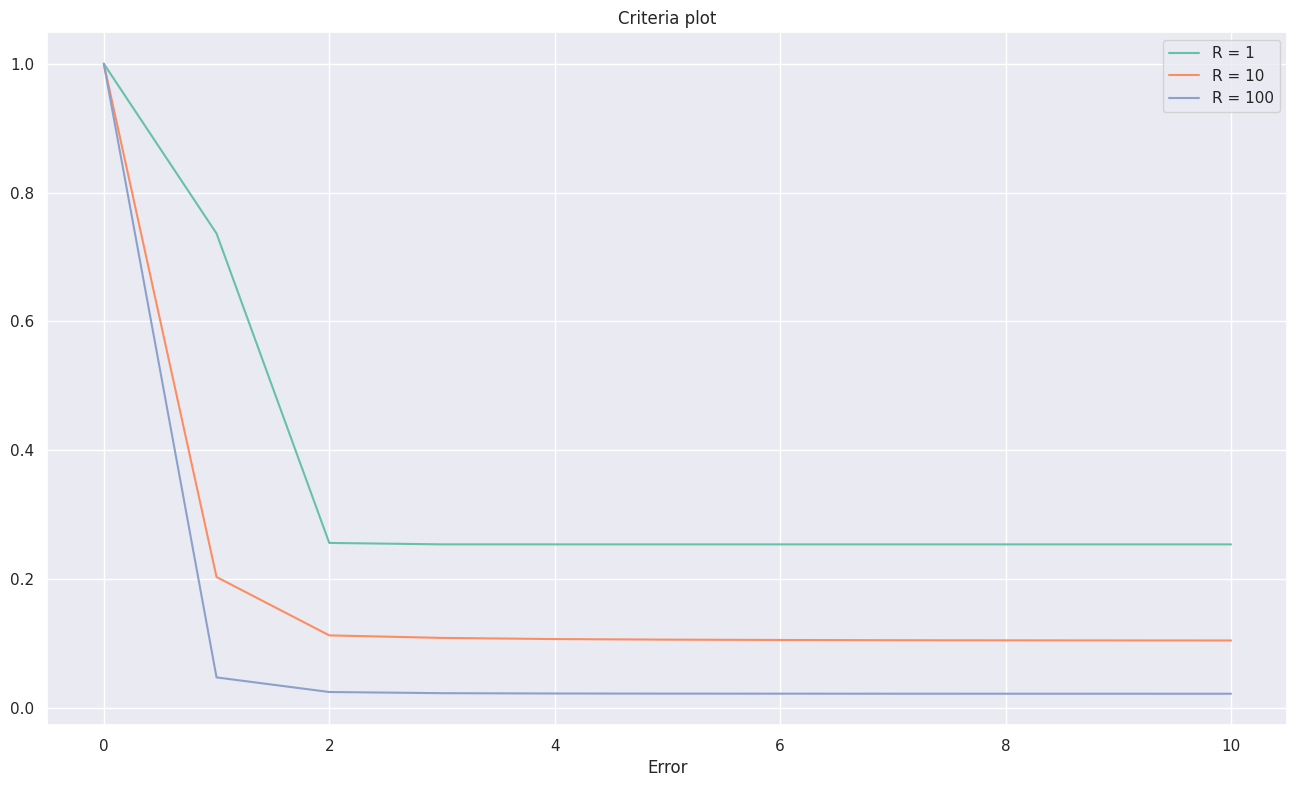

In [26]:
err_lr_fig, err_lr_axs = plt.subplots()
err_lr_axs.set_title("Criteria plot")
err_lr_axs.set_xlabel("Iteration")
err_lr_axs.set_xlabel("Error")

for i in range(len(R)):
    sns.lineplot(x=np.arange(0, ITER + 1), y=error_lr[i], ax=err_lr_axs, label=f"R = {R[i]}")
plt.show()

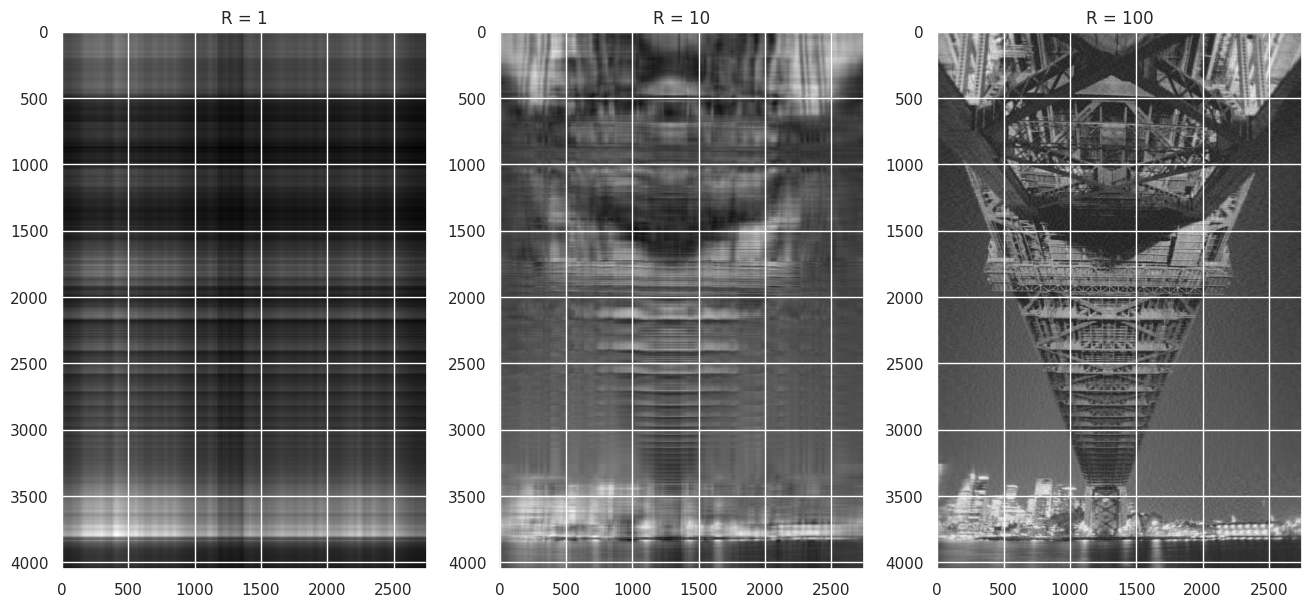

In [27]:
img_lr_fig, img_lr_axs = plt.subplots(ncols=len(R), figsize=(16, 9))

for i in range(len(R)):
    img_lr_axs[i].imshow(X_lambdr[i], cmap='gray')
    img_lr_axs[i].set_title("R = {}".format(R[i]))

С ростом $R$ все так же видно повышение качества изображения и уменьшение значения критерия ошибки. Теперь при $R = 100$ видна заметная разница и мы практически получаем исходное изображение

__г) (0.5 балла)__ Теперь, когда вы познакомились с двумя методами по поиску линейного разложения матрицы в случае фиксированного ранга, сделайте вывод о применимости каждого из них? Есть ли какие-то преимущества у метода ALS в сравнении с MatrixGD? Когда можно применять каждый из них?

Алгоритм ALS показывает существенно лучшие результаты при $R = 100$ как с точки зрения визуализации, так и с точки зрения значения критерия ошибки: ее скорость убывания больше. Алгоритм ALS лучше подходит для приближения изображений.

## Реализация backpropagation

Этот часть относится к курсу Practical DL Школы анализа данных Яндекса.

## Дополнительная часть (всего 10 баллов)

__Задача 4.__ Как было рассказано на лекциях и семинарах, для поиска ошибки в машинном обучении строится граф вычислений на основе метода _backpropagation_. В данной части вам будет представлена возможность самостоятельно реализовать различные модули, используемые в нейронных сетях. Для начала представим универсальных класс ```Module```, который определит фундаментальные методы для обучения (в нем НЕ НУЖНО ничего менять). 

Первым является __forward pass__ -- модуль получает входные данные, как-то их обрабатывает, а после выдает полученный результат, т.е.
$$\text{output = module.forward(input)}$$
Вторым же, как несложно догадаться, является __backward pass__ -- по цепному правилу (chain rule) прокидывается градиент от последнего слоя к первому, т.е. 
$$\text{gradInput = module.backward(input, gradOutput)}$$

In [ ]:
class Module(object):
    def __init__(self):
        self.output = None
        self.gradInput = None
        self.training = True

    def forward(self, input):
        return self.updateOutput(input)

    def backward(self, input, gradOutput):
        self.updateGradInput(input, gradOutput)
        self.accGradParameters(input, gradOutput)
        return self.gradInput

    def updateOutput(self, input):
        pass

    def updateGradInput(self, input, gradOutput):
        pass

    def accGradParameters(self, input, gradOutput):
        pass

    def zeroGradParameters(self):
        pass

    def getParameters(self):
        return []

    def getGradParameters(self):
        return []

    def train(self):
        self.training = True

    def evaluate(self):
        self.training = False

    def __repr__(self):
        return "Module"

__а) (2 балла)__ Реализуйте класс ```Sequential```, определяющий контейнер для последовательной обработки модулей (уровней). 

In [ ]:
class Sequential(Module):
    def __init__(self):
        super(Sequential, self).__init__()
        self.modules = []

    def add(self, module):
        self.modules.append(module)

    def updateOutput(self, input):
        '''
            В данной функции нужно реализовать
            последовательную передачу данных в
            forward pass, используя в качестве 
            входа в новом уровне выход со старого.
        '''

        # Ваше решение

        return self.output

    def backward(self, input, gradOutput):
        '''
            Здесь нужно реализовать последовательную
            передачу градиента по цепному правилу.
            ВАЖНО: убедитесь в том, что при подсчете 
            k-го градиента на вход подается output module[k-1],
            а не его input.  

            g_k = module[k].backward(module[k - 1].output, g_{k + 1})
        '''

        # Ваше решение

        return self.gradInput

    def zeroGradParameters(self):
        for module in self.modules:
            module.zeroGradParameters()

    def getParameters(self):
        return [x.getParameters() for x in self.modules]

    def getGradParameters(self):
        return [x.getGradParameters() for x in self.modules]

    def __repr__(self):
        string = "".join([str(x) + '\n' for x in self.modules])
        return string

    def __getitem__(self, x):
        return self.modules.__getitem__(x)

    def train(self):
        self.training = True
        for module in self.modules:
            module.train()

    def evaluate(self):
        self.training = False
        for module in self.modules:
            module.evaluate()

__б) (2 балла)__ Теперь реализуйте линейный слой (также известный как _dense layer, fully-connected layer, FC-layer_). Он работает с 2D входными даннами размера (n_samples, n_feature). Так как обычно данные передаются в виде батча, то вход и выход могут быть записаны так:
- input:   `batch_size x n_feature_1`
- output: `batch_size x n_feature_2`

In [ ]:
class Linear(Module):
    def __init__(self, n_in, n_out):
        super(Linear, self).__init__()

        stdv = 1. / np.sqrt(n_in)
        self.W = np.random.uniform(-stdv, stdv, size=(n_out, n_in))
        self.b = np.random.uniform(-stdv, stdv, size=n_out)

        self.gradW = np.zeros_like(self.W)
        self.gradb = np.zeros_like(self.b)

    def updateOutput(self, input):
        # Ваше решение
        # self.output = ...
        return self.output

    def updateGradInput(self, input, gradOutput):
        # Ваше решение
        # self.gradInput = ...
        return self.gradInput

    def accGradParameters(self, input, gradOutput):
        # Ваше решение
        # self.gradW = ... ; self.gradb = ...
        pass

    def zeroGradParameters(self):
        self.gradW.fill(0)
        self.gradb.fill(0)

    def getParameters(self):
        return [self.W, self.b]

    def getGradParameters(self):
        return [self.gradW, self.gradb]

    def __repr__(self):
        s = self.W.shape
        q = 'Linear %d -> %d' % (s[1], s[0])
        return q

__в) (2 балла)__ Следующим будет нужно реализовать SoftMax слой, преобразующий полученные значения в аналог вероятности. Напомним, что функция softmax может быть определена следующим образом:
$$\text{softmax(x)}_i = \frac{\exp x_i}{\sum \limits_{j} \exp x_j}. $$

_Указание:_ чтобы избежать нестабильности в вычислении экспоненты от большого числа, используется следующее свойство: 
$$\text{softmax(x)} = \text{softmax(x - const)}$$

In [ ]:
class SoftMax(Module):
    def __init__(self):
        super(SoftMax, self).__init__()

    def updateOutput(self, input):
        self.output = np.subtract(input, input.max(axis=1, keepdims=True))

        # Ваше решение

        return self.output

    def updateGradInput(self, input, gradOutput):
        # Ваше решение

        return self.gradInput

    def __repr__(self):
        return "SoftMax"

__г) (2 балла)__ Ну и как же без функции активации, которая добавляет нелинейность в нейронную сеть. Рассмотрим самую популярную -- Leaky ReLU ([Leaky Rectified Linear Unit](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)#Leaky_ReLUs)). Поэкспериментируйте со значением коэфциента наклона slope. 

In [ ]:
class LeakyReLU(Module):
    def __init__(self, slope=0.03):
        super(LeakyReLU, self).__init__()

        self.slope = slope

    def updateOutput(self, input):
        # Ваше решение

        return self.output

    def updateGradInput(self, input, gradOutput):
        # Ваше решение

        return self.gradInput

    def __repr__(self):
        return "LeakyReLU"

__д) (2 балла)__ Последний этап -- добавление критерия (функции потерь). Так как с MSE вы познакомились в основной части работы, то теперь к рассмотрению будет предложена ClassNLLCriterion. Он должен реализовывать [multiclass log loss](https://scikit-learn.org/stable/modules/model_evaluation.html#log-loss). Несмотря на то, что в этой формуле есть сумма по __y__ (target), помните, что target-ы кодируются с помощью one-hot encoder. Этот факт значительно упрощает вычисления. Обратите внимание, что критерии - единственное место, где вы делите на размер батча. Также есть небольшой хак с добавлением небольшого числа к вероятности, чтобы избежать вычисления log(0).
- input:   `batch_size x n_feats` - вероятности
- target: `batch_size x n_feats` - one-hot representation
- output: число

In [ ]:
class Criterion(object):
    def __init__(self):
        self.output = None
        self.gradInput = None

    def forward(self, input, target):
        return self.updateOutput(input, target)

    def backward(self, input, target):
        return self.updateGradInput(input, target)

    def updateOutput(self, input, target):
        return self.output

    def updateGradInput(self, input, target):
        return self.gradInput

    def __repr__(self):
        return "Criterion"


class ClassNLLCriterion(Criterion):
    EPS = 1e-15

    def __init__(self):
        a = super(ClassNLLCriterion, self)
        super(ClassNLLCriterion, self).__init__()

    def updateOutput(self, input, target):
        input_clamp = np.clip(input, self.EPS, 1 - self.EPS)

        # Ваше решение

        return self.output

    def updateGradInput(self, input, target):
        input_clamp = np.clip(input, self.EPS, 1 - self.EPS)

        # Ваше решение

        return self.gradInput

    def __repr__(self):
        return "ClassNLLCriterionUnstable"

### Тесты 

Для вашего удобства проверки своих реализаций мы добавили автоматические тесты для каждого из реализованных классов.

In [ ]:
import torch
import numpy as np
import unittest
import sys


class TestLayers(unittest.TestCase):
    def test_Linear(self):
        np.random.seed(42)
        torch.manual_seed(42)

        batch_size, n_in, n_out = 2, 3, 4
        for _ in range(100):
            # Инициализация слоев
            torch_layer = torch.nn.Linear(n_in, n_out)
            custom_layer = Linear(n_in, n_out)
            custom_layer.W = torch_layer.weight.data.numpy()
            custom_layer.b = torch_layer.bias.data.numpy()

            layer_input = np.random.uniform(-10, 10, (batch_size, n_in)).astype(np.float32)
            next_layer_grad = np.random.uniform(-10, 10, (batch_size, n_out)).astype(np.float32)

            # 1. Проверка выхода слоя
            custom_layer_output = custom_layer.updateOutput(layer_input)
            layer_input_var = torch.from_numpy(layer_input).requires_grad_(True)
            torch_layer_output_var = torch_layer(layer_input_var)
            self.assertTrue(np.allclose(torch_layer_output_var.data.numpy(), custom_layer_output, atol=1e-6))

            # 2. Проверка градиента входа
            custom_layer_grad = custom_layer.updateGradInput(layer_input, next_layer_grad)
            torch_layer_output_var.backward(torch.from_numpy(next_layer_grad))
            torch_layer_grad_var = layer_input_var.grad
            self.assertTrue(np.allclose(torch_layer_grad_var.data.numpy(), custom_layer_grad, atol=1e-6))

            # 3. Проверка градиентов параметров
            custom_layer.accGradParameters(layer_input, next_layer_grad)
            weight_grad = custom_layer.gradW
            bias_grad = custom_layer.gradb
            torch_weight_grad = torch_layer.weight.grad.data.numpy()
            torch_bias_grad = torch_layer.bias.grad.data.numpy()
            self.assertTrue(np.allclose(torch_weight_grad, weight_grad, atol=1e-6))
            self.assertTrue(np.allclose(torch_bias_grad, bias_grad, atol=1e-6))

    def test_SoftMax(self):
        np.random.seed(42)
        torch.manual_seed(42)

        batch_size, n_in = 2, 4
        for _ in range(100):
            # Инициализация слоев
            torch_layer = torch.nn.Softmax(dim=1)
            custom_layer = SoftMax()

            layer_input = np.random.uniform(-10, 10, (batch_size, n_in)).astype(np.float32)
            next_layer_grad = np.random.random((batch_size, n_in)).astype(np.float32)
            next_layer_grad /= next_layer_grad.sum(axis=-1, keepdims=True)
            next_layer_grad = next_layer_grad.clip(1e-5, 1.)
            next_layer_grad = 1. / next_layer_grad

            # 1. Проверка выхода слоя
            custom_layer_output = custom_layer.updateOutput(layer_input)
            layer_input_var = torch.from_numpy(layer_input).requires_grad_(True)
            torch_layer_output_var = torch_layer(layer_input_var)
            self.assertTrue(np.allclose(torch_layer_output_var.data.numpy(), custom_layer_output, atol=1e-5))

            # 2. Проверка градиента входа
            custom_layer_grad = custom_layer.updateGradInput(layer_input, next_layer_grad)
            torch_layer_output_var.backward(torch.from_numpy(next_layer_grad))
            torch_layer_grad_var = layer_input_var.grad
            self.assertTrue(np.allclose(torch_layer_grad_var.data.numpy(), custom_layer_grad, atol=1e-5))

    def test_LeakyReLU(self):
        np.random.seed(42)
        torch.manual_seed(42)

        batch_size, n_in = 2, 4
        for _ in range(100):
            # Инициализация слоев
            slope = np.random.uniform(0.01, 0.05)
            torch_layer = torch.nn.LeakyReLU(slope)
            custom_layer = LeakyReLU(slope)

            layer_input = np.random.uniform(-5, 5, (batch_size, n_in)).astype(np.float32)
            next_layer_grad = np.random.uniform(-5, 5, (batch_size, n_in)).astype(np.float32)

            # 1. Проверка выхода слоя
            custom_layer_output = custom_layer.updateOutput(layer_input)
            layer_input_var = torch.from_numpy(layer_input).requires_grad_(True)
            torch_layer_output_var = torch_layer(layer_input_var)
            self.assertTrue(np.allclose(torch_layer_output_var.data.numpy(), custom_layer_output, atol=1e-6))

            # 2. Проверка градиента входа
            custom_layer_grad = custom_layer.updateGradInput(layer_input, next_layer_grad)
            torch_layer_output_var.backward(torch.from_numpy(next_layer_grad))
            torch_layer_grad_var = layer_input_var.grad
            self.assertTrue(np.allclose(torch_layer_grad_var.data.numpy(), custom_layer_grad, atol=1e-6))

    def test_ClassNLLCriterion(self):
        np.random.seed(42)
        torch.manual_seed(42)

        batch_size, n_in = 2, 4
        for _ in range(100):
            # Инициализация слоев
            torch_layer = torch.nn.NLLLoss()
            custom_layer = ClassNLLCriterion()

            layer_input = np.random.uniform(0, 1, (batch_size, n_in)).astype(np.float32)
            layer_input /= layer_input.sum(axis=-1, keepdims=True)
            layer_input = layer_input.clip(custom_layer.EPS, 1. - custom_layer.EPS)
            target_labels = np.random.choice(n_in, batch_size)
            target = np.zeros((batch_size, n_in), np.float32)
            target[np.arange(batch_size), target_labels] = 1

            # 1. Проверка выхода слоя
            custom_layer_output = custom_layer.updateOutput(layer_input, target)
            layer_input_var = torch.from_numpy(layer_input).requires_grad_(True)

            torch_layer_output_var = torch_layer(
                torch.log(layer_input_var),
                torch.from_numpy(target_labels).to(torch.long))

            self.assertTrue(np.allclose(torch_layer_output_var.data.numpy(), custom_layer_output, atol=1e-6))

            # 2. Проверка градиента входа
            custom_layer_grad = custom_layer.updateGradInput(layer_input, target)
            torch_layer_output_var.backward()
            torch_layer_grad_var = layer_input_var.grad
            self.assertTrue(np.allclose(torch_layer_grad_var.data.numpy(), custom_layer_grad, atol=1e-6))


suite = unittest.TestLoader().loadTestsFromTestCase(TestLayers)
unittest.TextTestRunner(verbosity=2).run(suite)